In [1]:
%matplotlib inline
from tensorflow.keras import models
from tensorflow.python.keras.utils.data_utils import Sequence

In [3]:

import deeptrack as dt
import numpy as np
import skimage.color
import matplotlib.pyplot as plt

d:\miniconda3\envs\ml\lib\site-packages\deeptrack\backend\_config.py:11: UserWarning: cupy not installed. GPU-accelerated simulations will not be possible
  warnings.warn(
d:\miniconda3\envs\ml\lib\site-packages\deeptrack\backend\_config.py:25: UserWarning: cupy not installed, CPU acceleration not enabled
  warnings.warn("cupy not installed, CPU acceleration not enabled")
d:\miniconda3\envs\ml\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(-0.5, 23.5, 23.5, -0.5)

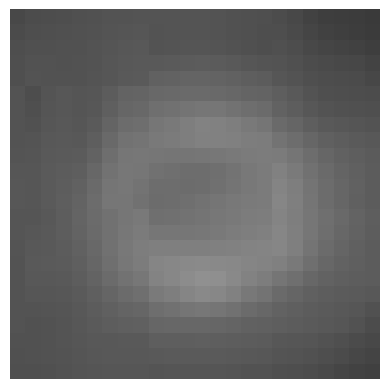

In [8]:
# t, x, y, w = (251, 80, 538, 40)
training_image = dt.LoadImage('D:/OneDrive/Desktop/PhysicsResearch/ParticleTracking/train_data/images/particles/09hz left19.png')()._value / 256
crop = training_image
plt.imshow(crop)
plt.axis("off")


In [9]:

model = dt.models.LodeSTAR(input_shape=(None, None, 3))


In [10]:
model.load_weights("./model/weights")

In [11]:
train_set =   (
    dt.Value(crop)
    >> dt.Add(lambda: np.random.randn() * 0.1)
    >> dt.Gaussian(sigma=lambda:np.random.uniform(0, 0.2))  
    >> dt.Multiply(lambda: np.random.uniform(0.6, 1.2))
)
# model.model.consistency_weight = X


model.fit(
    train_set,
    epochs=30,
    batch_size=8,
)



Generating 163 / 160 samples before starting training
Epoch 1/30
163/163 [==============================] - 10s 26ms/step - total_loss: 0.0897 - consistency_loss: 0.0082
Epoch 2/30
163/163 [==============================] - 8s 49ms/step - total_loss: 0.1301 - consistency_loss: 0.0165                     
Epoch 3/30
163/163 [==============================] - 17s 102ms/step - total_loss: 0.0714 - consistency_loss: 0.0067                                   
Epoch 4/30
163/163 [==============================] - 35s 216ms/step - total_loss: 0.0587 - consistency_loss: 0.0051                                      
Epoch 5/30
163/163 [==============================] - 34s 211ms/step - total_loss: 0.0484 - consistency_loss: 0.0040                                      
Epoch 6/30
163/163 [==============================] - 35s 213ms/step - total_loss: 0.0483 - consistency_loss: 0.0037                                      
Epoch 7/30
163/163 [==============================] - 31s 193ms/step - total_

1/1 [==============================] - 0s 176ms/step


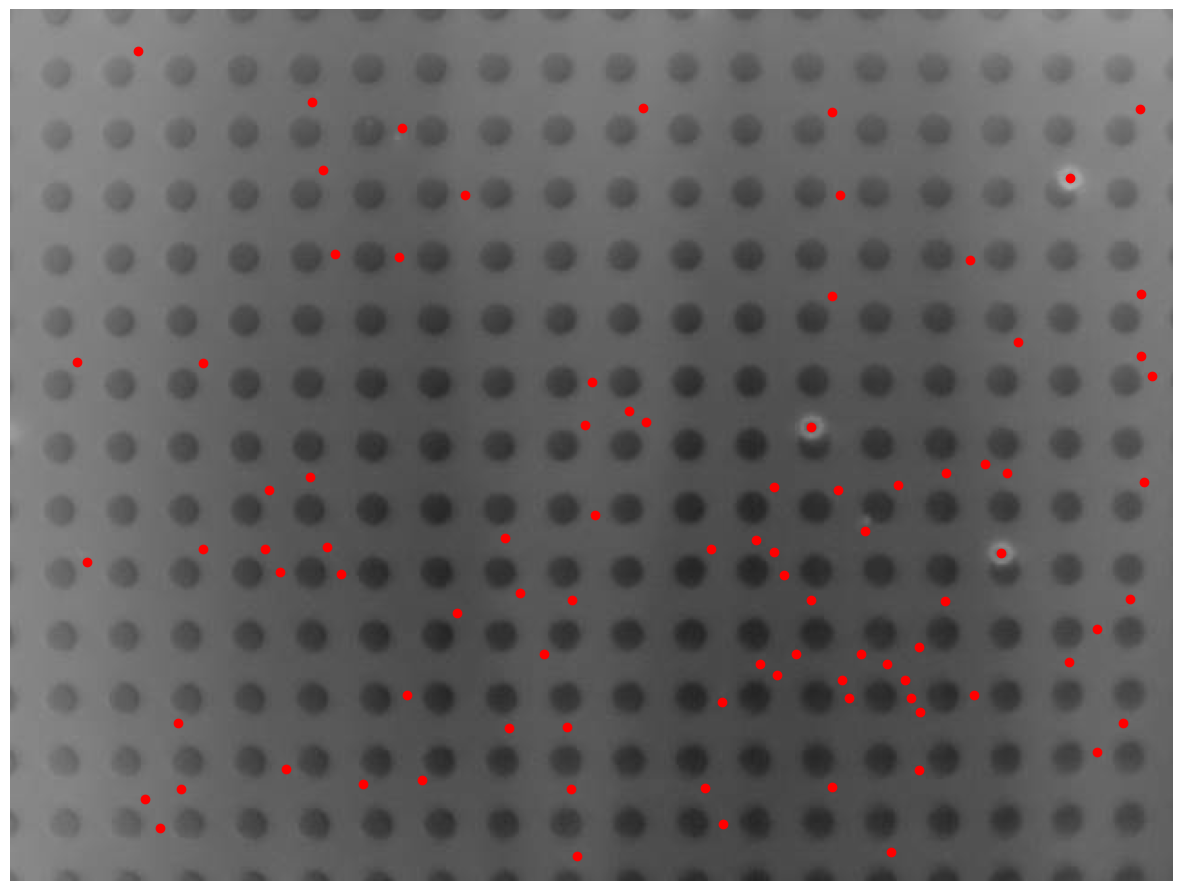

In [15]:
#May need to tune these to get optimal performance!
alpha = 0.5
cutoff = 0.998

# frame_index = 1763

image = dt.LoadImage('D:/OneDrive/Desktop/PhysicsResearch/ParticleTracking/test_data/videos/01hz left/01hz left0.png')()._value / 256
# image = image[130:-130, :400]

detections = model.predict_and_detect(image[np.newaxis], alpha=alpha, beta=1-alpha, cutoff=cutoff, mode="quantile")[0]
# detections = autotracker.detect(pred[0], weights[0], beta=1-alpha, alpha=alpha, cutoff=cutoff, mode="constant")

plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.axis("off")
plt.scatter(detections[:, 1], detections[:, 0], color="r")

In [14]:
model.save_weights("./model/weights")